In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


In [24]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e13/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e13/test.csv")

In [25]:
train_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [26]:
test_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [28]:
import pandas as pd

# Read the entire CSV file into a DataFrame
train_df = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')

# Display the summary statistics of the DataFrame
summary_stats = train_df.describe()
print(summary_stats)


               id  sudden_fever    headache  mouth_bleed  nose_bleed  \
count  707.000000    707.000000  707.000000   707.000000  707.000000   
mean   353.000000      0.503536    0.449788     0.459689    0.487977   
std    204.237607      0.500341    0.497825     0.498725    0.500209   
min      0.000000      0.000000    0.000000     0.000000    0.000000   
25%    176.500000      0.000000    0.000000     0.000000    0.000000   
50%    353.000000      1.000000    0.000000     0.000000    0.000000   
75%    529.500000      1.000000    1.000000     1.000000    1.000000   
max    706.000000      1.000000    1.000000     1.000000    1.000000   

       muscle_pain  joint_pain    vomiting        rash    diarrhea  ...  \
count   707.000000  707.000000  707.000000  707.000000  707.000000  ...   
mean      0.517680    0.449788    0.441301    0.487977    0.390382  ...   
std       0.500041    0.497825    0.496894    0.500209    0.488181  ...   
min       0.000000    0.000000    0.000000    0.000

In [29]:
import pandas as pd

# Read the entire CSV file into a DataFrame
test_df = pd.read_csv('/kaggle/input/playground-series-s3e13/test.csv')

# Display the summary statistics of the DataFrame
summary_stats = test_df.describe()
print(summary_stats)

                id  sudden_fever    headache  mouth_bleed  nose_bleed  \
count   303.000000    303.000000  303.000000   303.000000  303.000000   
mean    858.000000      0.577558    0.462046     0.458746    0.504950   
std      87.612784      0.494765    0.499382     0.499120    0.500803   
min     707.000000      0.000000    0.000000     0.000000    0.000000   
25%     782.500000      0.000000    0.000000     0.000000    0.000000   
50%     858.000000      1.000000    0.000000     0.000000    1.000000   
75%     933.500000      1.000000    1.000000     1.000000    1.000000   
max    1009.000000      1.000000    1.000000     1.000000    1.000000   

       muscle_pain  joint_pain    vomiting        rash    diarrhea  ...  \
count   303.000000  303.000000  303.000000  303.000000  303.000000  ...   
mean      0.531353    0.541254    0.488449    0.448845    0.458746  ...   
std       0.499842    0.499120    0.500693    0.498199    0.499120  ...   
min       0.000000    0.000000    0.000000

**The number of instances (rows) and attributes (columns)**

In [30]:
print(f"Number of instances = {train_df.shape[0]}")
print(f"Number of attributes = {train_df.shape[1]}")
#data.describe(include='all')
print(train_df.shape)

Number of instances = 707
Number of attributes = 66
(707, 66)


In [31]:
print(f"Number of instances = {test_df.shape[0]}")
print(f"Number of attributes = {test_df.shape[1]}")
#data.describe(include='all')
print(test_df.shape)

Number of instances = 303
Number of attributes = 65
(303, 65)


In [32]:
import numpy as np

print('Number of missing values:')
for col in train_df.columns:
    d=train_df[col]
    print(f"\t {col}: {d.isnull().sum()}")

Number of missing values:
	 id: 0
	 sudden_fever: 0
	 headache: 0
	 mouth_bleed: 0
	 nose_bleed: 0
	 muscle_pain: 0
	 joint_pain: 0
	 vomiting: 0
	 rash: 0
	 diarrhea: 0
	 hypotension: 0
	 pleural_effusion: 0
	 ascites: 0
	 gastro_bleeding: 0
	 swelling: 0
	 nausea: 0
	 chills: 0
	 myalgia: 0
	 digestion_trouble: 0
	 fatigue: 0
	 skin_lesions: 0
	 stomach_pain: 0
	 orbital_pain: 0
	 neck_pain: 0
	 weakness: 0
	 back_pain: 0
	 weight_loss: 0
	 gum_bleed: 0
	 jaundice: 0
	 coma: 0
	 diziness: 0
	 inflammation: 0
	 red_eyes: 0
	 loss_of_appetite: 0
	 urination_loss: 0
	 slow_heart_rate: 0
	 abdominal_pain: 0
	 light_sensitivity: 0
	 yellow_skin: 0
	 yellow_eyes: 0
	 facial_distortion: 0
	 microcephaly: 0
	 rigor: 0
	 bitter_tongue: 0
	 convulsion: 0
	 anemia: 0
	 cocacola_urine: 0
	 hypoglycemia: 0
	 prostraction: 0
	 hyperpyrexia: 0
	 stiff_neck: 0
	 irritability: 0
	 confusion: 0
	 tremor: 0
	 paralysis: 0
	 lymph_swells: 0
	 breathing_restriction: 0
	 toe_inflammation: 0
	 finger_infla

**The number of missing values for each attribute**

In [33]:
import numpy as np

print('Number of missing values:')
for col in test_df.columns:
    d=test_df[col]
    print(f"\t {col}: {d.isnull().sum()}")

Number of missing values:
	 id: 0
	 sudden_fever: 0
	 headache: 0
	 mouth_bleed: 0
	 nose_bleed: 0
	 muscle_pain: 0
	 joint_pain: 0
	 vomiting: 0
	 rash: 0
	 diarrhea: 0
	 hypotension: 0
	 pleural_effusion: 0
	 ascites: 0
	 gastro_bleeding: 0
	 swelling: 0
	 nausea: 0
	 chills: 0
	 myalgia: 0
	 digestion_trouble: 0
	 fatigue: 0
	 skin_lesions: 0
	 stomach_pain: 0
	 orbital_pain: 0
	 neck_pain: 0
	 weakness: 0
	 back_pain: 0
	 weight_loss: 0
	 gum_bleed: 0
	 jaundice: 0
	 coma: 0
	 diziness: 0
	 inflammation: 0
	 red_eyes: 0
	 loss_of_appetite: 0
	 urination_loss: 0
	 slow_heart_rate: 0
	 abdominal_pain: 0
	 light_sensitivity: 0
	 yellow_skin: 0
	 yellow_eyes: 0
	 facial_distortion: 0
	 microcephaly: 0
	 rigor: 0
	 bitter_tongue: 0
	 convulsion: 0
	 anemia: 0
	 cocacola_urine: 0
	 hypoglycemia: 0
	 prostraction: 0
	 hyperpyrexia: 0
	 stiff_neck: 0
	 irritability: 0
	 confusion: 0
	 tremor: 0
	 paralysis: 0
	 lymph_swells: 0
	 breathing_restriction: 0
	 toe_inflammation: 0
	 finger_infla

**The number of unique elements**

In [34]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Read the CSV file into a DataFrame
train_df = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')

# Initialize the OrdinalEncoder
enc = OrdinalEncoder()

# Apply the OrdinalEncoder to the 'prognosis' column
train_df['prognosis'] = enc.fit_transform(train_df[['prognosis']])

# Convert the 'prognosis' column to a pandas Series
y = train_df['prognosis']

# Find the number of unique elements in the 'prognosis' column
n_unique = y.nunique()

print(f"Number of unique elements in the 'prognosis' column: {n_unique}")


Number of unique elements in the 'prognosis' column: 11


In [35]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

**The number of duplicates**

In [36]:
dups = train_df.duplicated()
print(f"Number of duplicate rows = {dups.sum()}")
print(f"Number of rows before discarding duplicates = {train_df.shape[0]}")
dataNoDup = train_df.drop_duplicates()
print(f"Number of rows after discarding duplicates = {dataNoDup.shape[0]}")

Number of duplicate rows = 0
Number of rows before discarding duplicates = 707
Number of rows after discarding duplicates = 707


In [37]:
dups = test_df.duplicated()
print(f"Number of duplicate rows = {dups.sum()}")
print(f"Number of rows before discarding duplicates = {test_df.shape[0]}")
dataNoDup = test_df.drop_duplicates()
print(f"Number of rows after discarding duplicates = {dataNoDup.shape[0]}")

Number of duplicate rows = 0
Number of rows before discarding duplicates = 303
Number of rows after discarding duplicates = 303


**Summary of all attributes**

In [38]:
train_df.describe()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,353.000000,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,...,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117,5.031117
std,204.237607,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,...,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758,3.189775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,353.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,529.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,706.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [39]:
test_df.describe()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,858.000000,0.577558,0.462046,0.458746,0.504950,0.531353,0.541254,0.488449,0.448845,0.458746,...,0.145215,0.092409,0.099010,0.102310,0.118812,0.165017,0.128713,0.122112,0.052805,0.033003
std,87.612784,0.494765,0.499382,0.499120,0.500803,0.499842,0.499120,0.500693,0.498199,0.499120,...,0.352900,0.290082,0.299169,0.303557,0.324102,0.371809,0.335436,0.327957,0.224015,0.178941
min,707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,782.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,858.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,933.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**The frequency of each value**

In [40]:
train_df['prognosis'].value_counts()

prognosis
8.0     85
2.0     81
7.0     70
6.0     70
0.0     66
1.0     63
9.0     61
10.0    58
5.0     53
3.0     52
4.0     48
Name: count, dtype: int64

<Axes: xlabel='prognosis'>

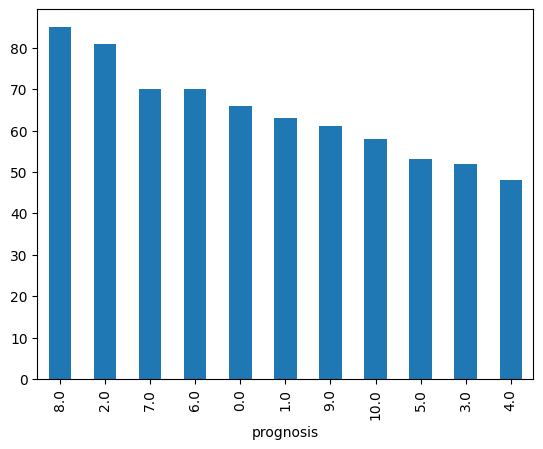

In [41]:
target_count = train_df['prognosis'].value_counts()
target_count.plot(kind='bar')

**A graph showing the distrubution of each attribute**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

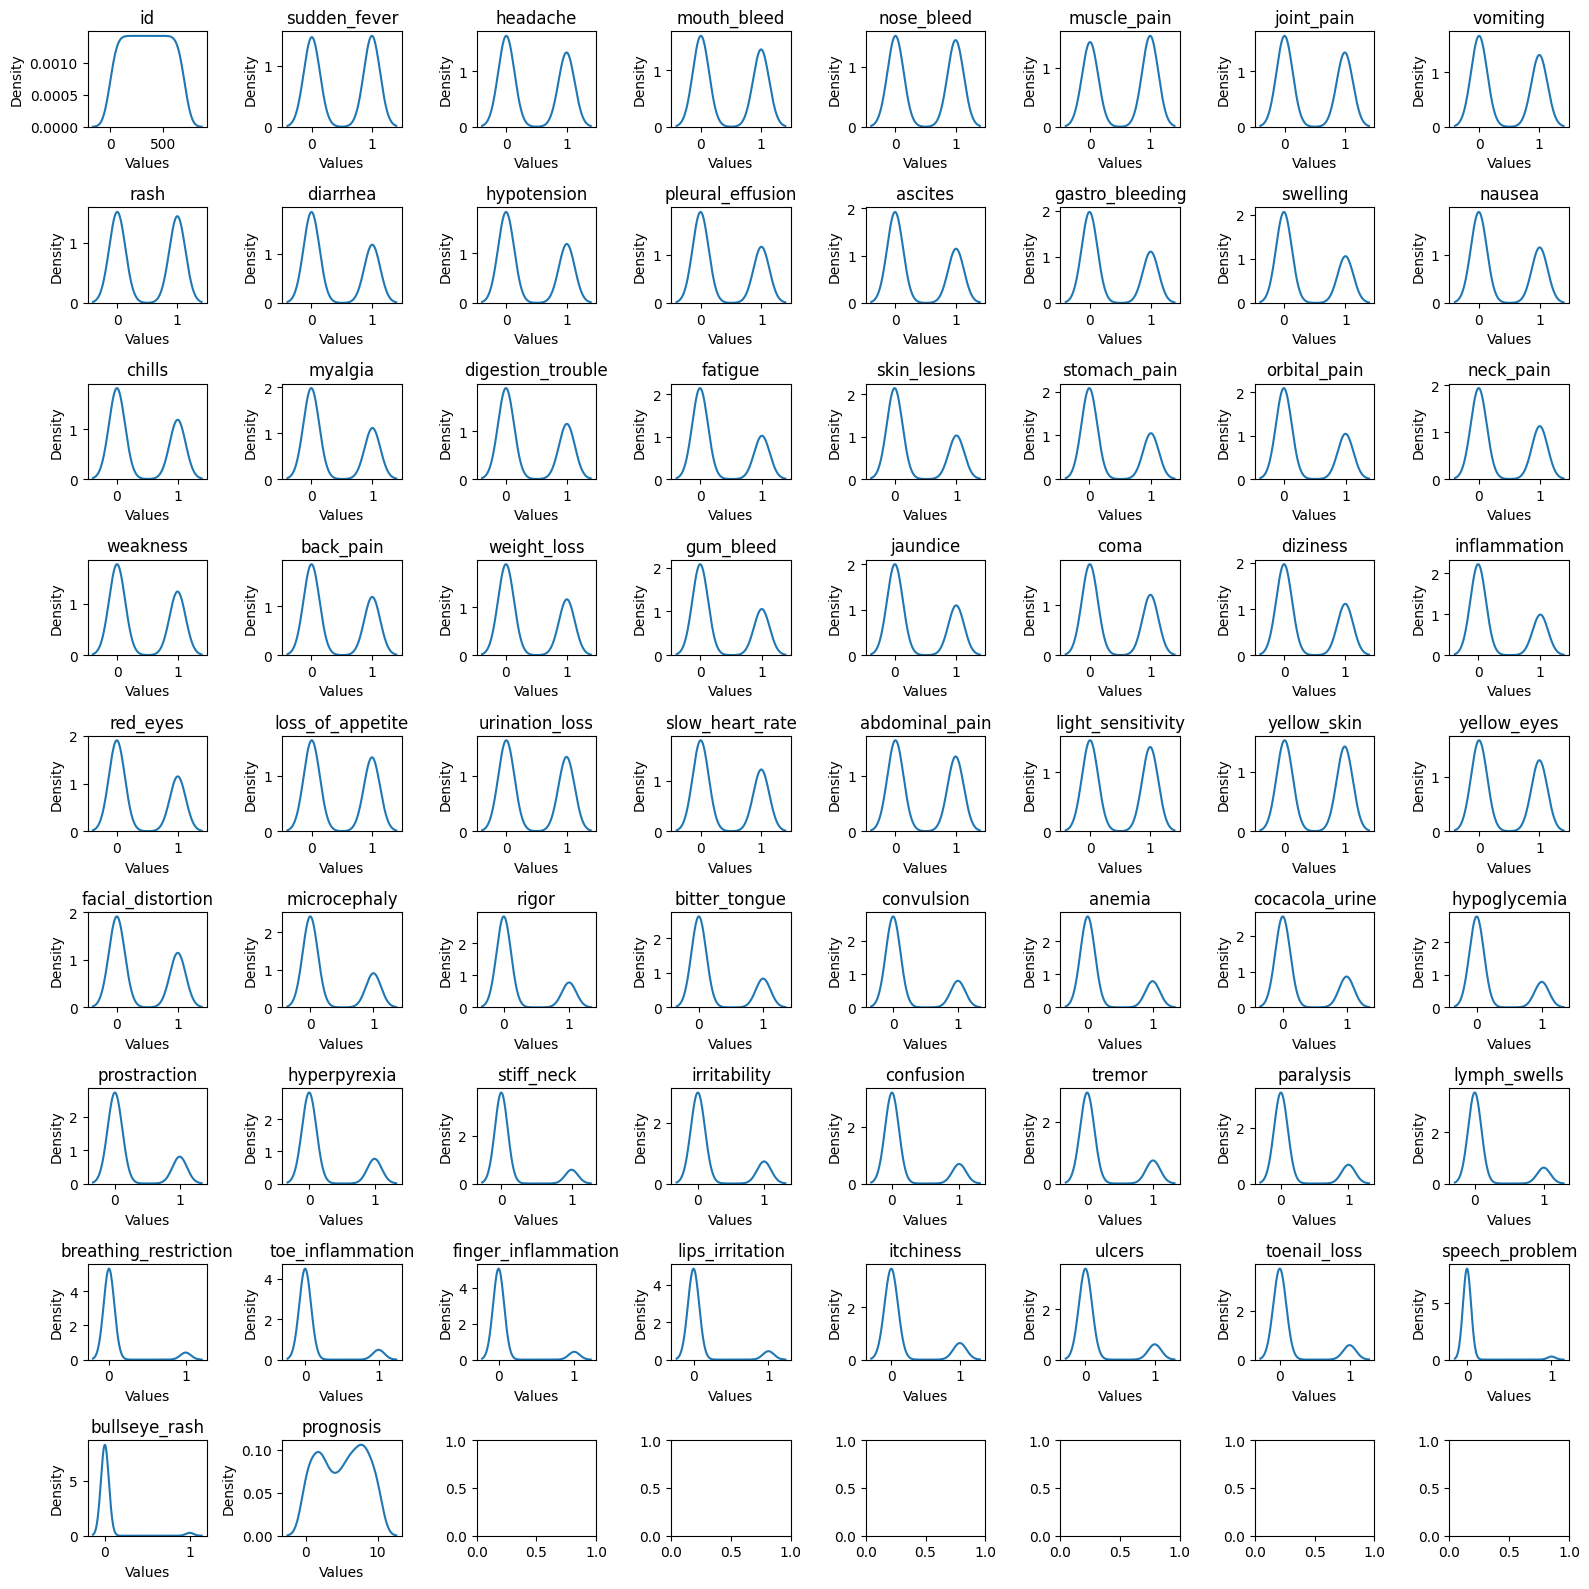

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the number of columns
ncols = 8

# Determine the number of rows based on the size of the dataframe
nrows = int(np.ceil(len(train_df.columns) / ncols))

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))

# Plot the KDE for each column
for i, col in enumerate(train_df.columns):
    row, col_num = divmod(i, ncols)  # Calculate row and column indices
    sns.kdeplot(train_df[col], ax=axes[row, col_num], label=col)
    axes[row, col_num].set_title(col)
    axes[row, col_num].set_xlabel('Values')
    axes[row, col_num].set_ylabel('Density')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

**The covariance and correlation**

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming train_df is your DataFrame

# Find all string columns
#string_columns = train_df.select_dtypes(include=['prognosis']).columns
# Find all columns with name 'prognosis'
string_columns = [col for col in train_df.columns if col == 'prognosis']

# Convert string columns to numerical columns using LabelEncoder
le = LabelEncoder()
for col in string_columns:
    train_df[col] = le.fit_transform(train_df[col])

# Calculate the covariance matrix
print('Covariance: ')
print(train_df.cov())

# Calculate the correlation matrix
print('Correlation: ')
print(train_df.corr())

Covariance: 
                          id  sudden_fever  headache  mouth_bleed  nose_bleed  \
id              41713.000000      2.005666  4.045326     5.069405    4.735127   
sudden_fever        2.005666      0.250342  0.030985     0.008995    0.024476   
headache            4.045326      0.030985  0.247829     0.035154    0.025245   
mouth_bleed         5.069405      0.008995  0.035154     0.248727    0.051568   
nose_bleed          4.735127      0.024476  0.025245     0.051568    0.250209   
...                      ...           ...       ...          ...         ...   
ulcers              0.691218     -0.044420 -0.018241    -0.021088   -0.030841   
toenail_loss        0.466006     -0.040854 -0.013639    -0.015000   -0.027385   
speech_problem      0.070822      0.004842  0.008010     0.006271    0.003933   
bullseye_rash       0.269122      0.002723  0.007230     0.005505    0.004624   
prognosis           6.219547     -0.126173 -0.113166    -0.168716   -0.227671   

              

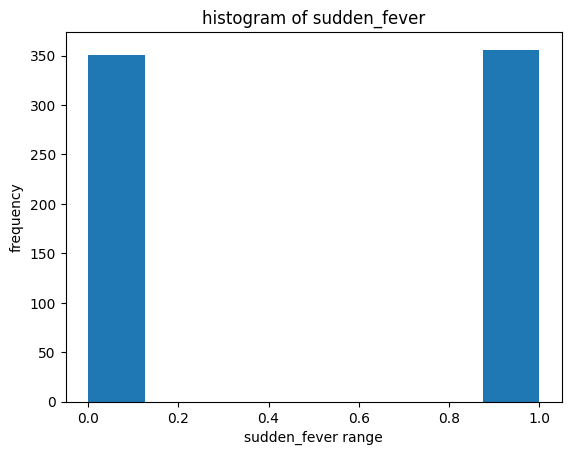

In [44]:
import matplotlib.pyplot as plt

plt.hist(train_df['sudden_fever'],bins=8,histtype='bar',rwidth=1)
plt.title('histogram of sudden_fever')
plt.xlabel('sudden_fever range')
plt.ylabel('frequency')
plt.show()

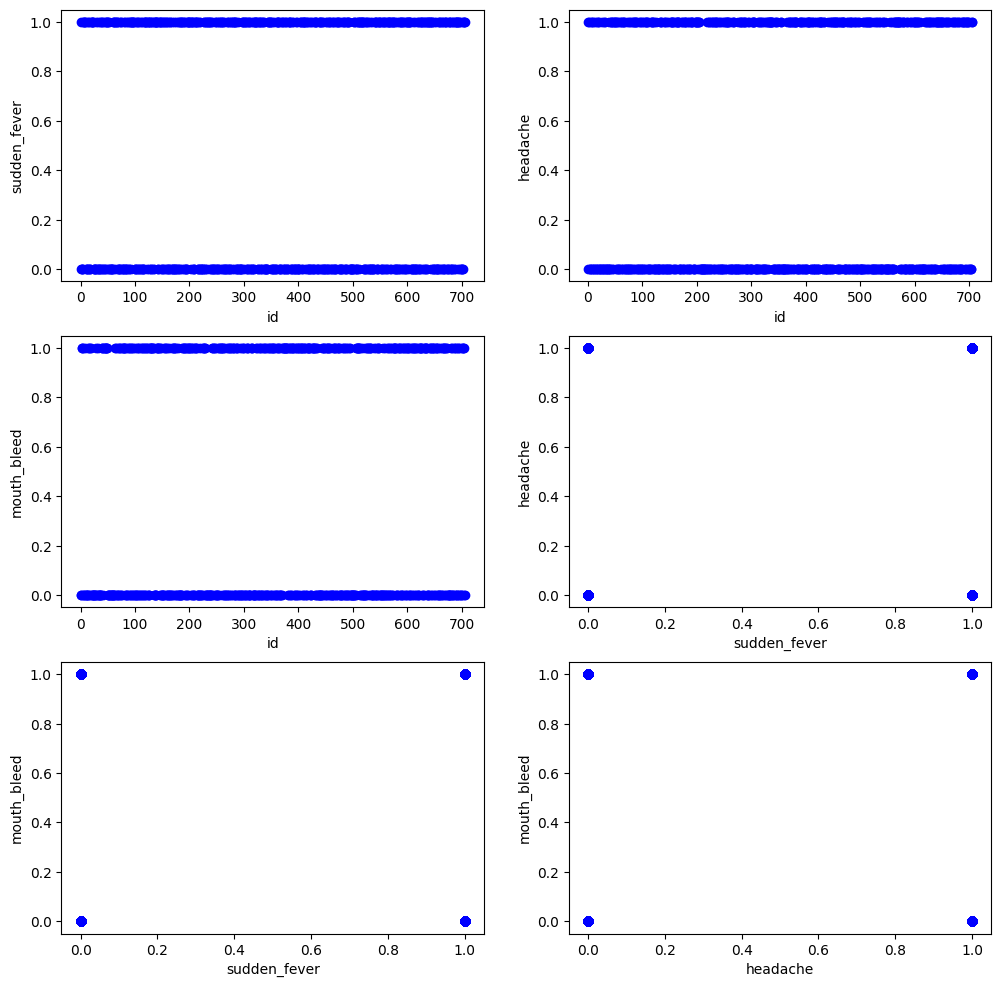

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(train_df[train_df.columns[i]], train_df[train_df.columns[j]], color='blue')
        axes[ax1][ax2].set_xlabel(train_df.columns[i])
        axes[ax1][ax2].set_ylabel(train_df.columns[j])
        index = index + 1
plt.show()

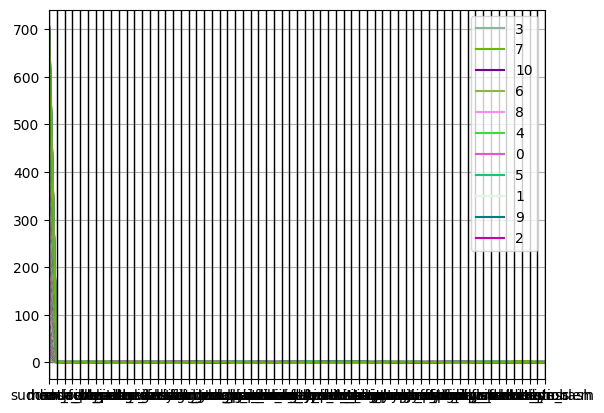

In [46]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(train_df, 'prognosis')
plt.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Separate features and target variable
X = train_df.drop(['id','prognosis'], axis=1)  # Replace 'target_column_name' with your target column
y = train_df['prognosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Further preprocessing steps (if needed)
# For example, you can handle missing values, encode categorical variables, etc.

# Print the preprocessed data
print('Preprocessed training data:')
print(X_train_scaled)
print('Preprocessed testing data:')
print(X_test_scaled)
print('Training labels:')
print(y_train)
print('Testing labels:')
print(y_test)

Preprocessed training data:
[[ 0.99470429  1.12653287  1.09083568 ... -0.39722397 -0.17613034
  -0.18140222]
 [ 0.99470429 -0.88767938  1.09083568 ... -0.39722397 -0.17613034
  -0.18140222]
 [-1.00532391 -0.88767938  1.09083568 ... -0.39722397 -0.17613034
   5.5126118 ]
 ...
 [-1.00532391 -0.88767938  1.09083568 ... -0.39722397 -0.17613034
  -0.18140222]
 [-1.00532391 -0.88767938 -0.91672836 ...  2.51747142 -0.17613034
  -0.18140222]
 [-1.00532391 -0.88767938 -0.91672836 ... -0.39722397 -0.17613034
  -0.18140222]]
Preprocessed testing data:
[[ 0.99470429 -0.88767938 -0.91672836 ... -0.39722397 -0.17613034
  -0.18140222]
 [-1.00532391  1.12653287  1.09083568 ...  2.51747142 -0.17613034
  -0.18140222]
 [-1.00532391 -0.88767938  1.09083568 ... -0.39722397 -0.17613034
  -0.18140222]
 ...
 [-1.00532391  1.12653287 -0.91672836 ... -0.39722397 -0.17613034
  -0.18140222]
 [-1.00532391 -0.88767938 -0.91672836 ...  2.51747142 -0.17613034
  -0.18140222]
 [-1.00532391 -0.88767938 -0.91672836 ... -

**Model 1**

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
model = NuSVC()
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Make predictions on the validation set
y_val_pred = model.predict(X_test_scaled)

# Calculate and print the validation accuracy
val_accuracy = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.9097345132743363
Validation Accuracy: 0.34507042253521125


In [49]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import NuSVC

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the NuSVC model
model = NuSVC()

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print(f"Mean Cross-validation Accuracy: {mean_cv_score}")

# Fit the model on the entire training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Cross-validation scores: [0.2920354  0.30088496 0.34513274 0.24778761 0.37168142]
Mean Cross-validation Accuracy: 0.3115044247787611
Test Accuracy: 0.34507042253521125


**Model 2**

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
model = ExtraTreesClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.29577464788732394


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

model = ExtraTreesClassifier()

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score (training accuracy)
mean_cv_score = cv_scores.mean()
print(f"Mean Cross-validation Accuracy: {mean_cv_score}")

# Fit the model on the entire training set
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_test_scaled)

# Calculate and print the validation accuracy
val_accuracy = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Cross-validation scores: [0.31858407 0.30973451 0.27433628 0.2300885  0.33628319]
Mean Cross-validation Accuracy: 0.2938053097345133
Validation Accuracy: 0.29577464788732394


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the ExtraTreesClassifier model
model = ExtraTreesClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate and print the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.29577464788732394


**Model 3**

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
model = BernoulliNB()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.323943661971831


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
# Initialize the BernoulliNB model
model = BernoulliNB()

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores (training accuracy)
print("Cross-validation scores (training accuracy):", cv_scores)

# Calculate and print the mean cross-validation score (training accuracy)
mean_cv_score = cv_scores.mean()
print(f"Mean Cross-validation Accuracy (training accuracy): {mean_cv_score}")

# Fit the model on the entire training set
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_test_scaled)

# Calculate and print the validation accuracy
val_accuracy = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Cross-validation scores (training accuracy): [0.2920354  0.27433628 0.34513274 0.2920354  0.36283186]
Mean Cross-validation Accuracy (training accuracy): 0.31327433628318585
Validation Accuracy: 0.323943661971831


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
# Set the parameters to search over
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

# Initialize the BernoulliNB model
model = BernoulliNB()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate and print the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Best Parameters: {'alpha': 0.1, 'binarize': 0.0, 'fit_prior': False}
Accuracy: 0.33098591549295775


**Model 4**

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Initialize and train the SVC model
model = SVC()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.323943661971831


In [57]:
model = SVC()

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores (training accuracy)
print("Cross-validation scores (training accuracy):", cv_scores)

# Calculate and print the mean cross-validation score (training accuracy)
mean_cv_score = cv_scores.mean()
print(f"Mean Cross-validation Accuracy (training accuracy): {mean_cv_score}")

# Fit the model on the entire training set
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_test_scaled)

# Calculate and print the validation accuracy
val_accuracy = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Cross-validation scores (training accuracy): [0.30973451 0.31858407 0.33628319 0.2300885  0.38938053]
Mean Cross-validation Accuracy (training accuracy): 0.3168141592920354
Validation Accuracy: 0.323943661971831


**Model 5**

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
model = NearestCentroid()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.30985915492957744


**Model 6**

In [59]:
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Initialize the RandomForestClassifier model
model = RandomForestClassifier()


# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores (training accuracy)
print("Cross-validation scores (training accuracy):", cv_scores)

# Calculate and print the mean cross-validation score (training accuracy)
mean_cv_score = cv_scores.mean()
print(f"Mean Cross-validation Accuracy (training accuracy): {mean_cv_score}")

# Fit the model on the entire training set
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_test_scaled)

# Calculate and print the validation accuracy
val_accuracy = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Cross-validation scores (training accuracy): [0.27433628 0.30973451 0.37168142 0.23893805 0.34513274]
Mean Cross-validation Accuracy (training accuracy): 0.30796460176991153
Validation Accuracy: 0.33098591549295775


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3028169014084507


**Model 7**

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# Initialize and train the LinearSVC model
model = LinearSVC()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.2887323943661972


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# Initialize and train the LinearSVC model
model = LinearSVC()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.2887323943661972


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [63]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# Initialize the LinearSVC model
model = LinearSVC()

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_scores = []
val_scores = []

# Perform cross-validation
for train_index, val_index in skf.split(X, y):
    X_train_scaled, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model.fit(X_train_scaled, y_train)

    # Calculate training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)

    # Calculate validation accuracy
    y_val_pred = model.predict(X_test_scaled)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    val_scores.append(val_accuracy)

# Calculate the average training and validation accuracy
avg_train_accuracy = sum(train_scores) / len(train_scores)
avg_val_accuracy = sum(val_scores) / len(val_scores)

print(f"Average Training Accuracy: {avg_train_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature 

Average Training Accuracy: 0.5835
Average Validation Accuracy: 0.2803


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC(C=0.1)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with C=0.1: {accuracy}")

Accuracy with C=0.1: 0.3380281690140845


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the LinearSVC model
model = LinearSVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)

# Perform grid search to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_

# Initialize a new LinearSVC model with the best parameters
best_model = LinearSVC(**best_params)

# Train the model on the full training set
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate and print the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Accuracy: {accuracy}")
print(f"Best Parameters: {best_params}")

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Accuracy: 0.3380281690140845
Best Parameters: {'C': 0.001}


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


**Model 8**

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
# Initialize and train the LGBMClassifier model
model = LGBMClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 566, number of used features: 63
[LightGBM] [Info] Start training from score -2.368302
[LightGBM] [Info] Start training from score -2.426571
[LightGBM] [Info] Start training from score -2.164207
[LightGBM] [Info] Start training from score -2.600924
[LightGBM] [Info] Start training from score -2.675032
[LightGBM] [Info] Start training from score -2.600924
[LightGBM] [Info] Start training from score -2.313242
[LightGBM] [Info] Start training from score -2.313242
[LightGBM] [Info] Start training from score -2.119086
[LightGBM] [Info] Start training from score -2.446774
[LightGBM] [Info] Start training from score -2.509953
[LightGBM] [Warning] No further splits with positive gai

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy with learning_rate=0.1, max_depth=5: {train_accuracy:.3f}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Training Accuracy with learning_rate=0.1, max_depth=5: 1.000
Accuracy: 0.8450704225352113


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the SelectFromModel with XGBoost
sfm = SelectFromModel(XGBClassifier(random_state=42), threshold='median')

# Fit the SelectFromModel to your training data
sfm.fit(X_train_scaled, y_train)

# Get the selected features
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)

# Train the XGBoost model with selected features
model11 = XGBClassifier(random_state=42)
model11.fit(X_train_selected, y_train)

# Make predictions on the training set
y_pred_train = model11.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy with learning_rate=0.1, max_depth=5: {train_accuracy:.3f}")

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(


Training Accuracy with learning_rate=0.1, max_depth=5: 0.928
Accuracy: 0.795774647887324


**Model 9**

In [68]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model2 = LinearDiscriminantAnalysis(n_components=None, priors=None)
model2.fit(X_train_scaled, y_train)

y_pred_train = model2.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy : {train_accuracy:.3f}")
# Make predictions on the test set

y_pred = model2.predict(X_test_scaled)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Training Accuracy : 0.509
Accuracy: 0.4084507042253521


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


****

**Classification Report**

In [69]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model2.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      1.00      0.49        12
           1       0.18      0.33      0.24         6
           2       0.53      0.47      0.50        17
           3       0.71      0.45      0.56        11
           4       0.20      0.20      0.20        10
           5       1.00      0.25      0.40        16
           6       0.29      0.17      0.21        12
           7       0.56      0.75      0.64        12
           8       0.60      0.17      0.26        18
           9       0.33      0.33      0.33        15
          10       0.40      0.46      0.43        13

    accuracy                           0.41       142
   macro avg       0.47      0.42      0.39       142
weighted avg       0.50      0.41      0.39       142



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [70]:
print(len(test_df['id']))
print(len(y_pred))

303
142


In [71]:

# Display the predicted labels
# print("Predicted labels for test_df:")
# print(y_pred)
# predictions_df = pd.DataFrame({'id': test_df['id'], 'prognosis': y_pred})
# print(predictions_df.tail(10))
#Save the predictions
# test_pred = model.predict(test_df)
# submit_df = pd.DataFrame({'id':test_df['id'],'prognosis':test_pred})
# submit_df.to_csv('submission.csv',index = False)
# test_df['prognosis'] = y_pred
# test_df[['id', 'prognosis']].to_csv('mypredictions.csv', index=False)

In [79]:
# Make predictions
test_pred = model2.predict(test_df.drop(['id'],axis=1))

# Reverse the encoding
decoded_pred = enc.inverse_transform(test_pred.reshape(-1, 1))

# Create the submission dataframe
submit_df = pd.DataFrame({'id': test_df['id'], 'prognosis': decoded_pred.flatten()})
submit_df.to_csv('submission.csv', index=False)